In [1]:
import pandas as pd
import numpy as np
emicron_original = pd.read_csv('../../../Outputs/emicron_natives.csv')  # Include the subdirectory in the file path

In [2]:
emicron = emicron_original.copy()

**creating clusters**

In [3]:
#REMOVING NON-NUMERIC COLUMNS, SCALING
from sklearn.preprocessing import StandardScaler

# Filter columns based on data types
numeric_columns = emicron.select_dtypes(include=['int64', 'float64'])

# Create a new DataFrame with only numeric columns
emicron = emicron[numeric_columns.columns]

# Now you can scale the data
scaler = StandardScaler()
X = scaler.fit_transform(emicron)

In [4]:
#RUNNING K-MEANS
from sklearn.cluster import KMeans
# There appears to be an elbow around a value of 7. We can refit a model with this value and see what the groups look like
kmeans_elbow = KMeans(n_clusters=7, n_init=20, random_state=0)

# Fitting and predicting in one line
y_pred_elbow = kmeans_elbow.fit_predict(X)

# Storing the predictions in a dataframe to work with
kmeans_pred_elbow = pd.DataFrame(
    {'cluster': y_pred_elbow},
    index=emicron.index
)

In [5]:
#ADDING CLUSTER COLUMN TO EMICRON
emicron = emicron_original.copy()
emicron['cluster'] = kmeans_pred_elbow['cluster']

**identifying clusters to analyse**

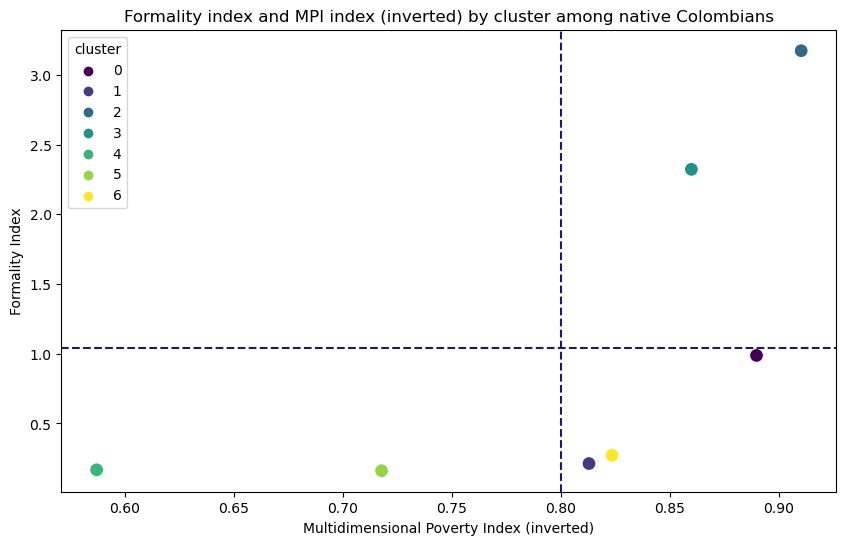

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

emicron['mpi_index_rev'] = 1-emicron['mpi_index']

# Assuming 'emicron' is your DataFrame and it has been defined already
mean_values = emicron.groupby('cluster')[['II', 'mpi_index_rev']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_values, x='mpi_index_rev', y='II', hue='cluster', palette='viridis', s=100)

# Add a vertical line at the middle of x-axis
plt.axvline(mean_values['mpi_index_rev'].mean(), color='#191970', linestyle='--')

# Add a horizontal line at the middle of y-axis
plt.axhline(mean_values['II'].mean(), color='#191970', linestyle='--')

plt.title('Formality index and MPI index (inverted) by cluster among native Colombians')
plt.xlabel('Multidimensional Poverty Index (inverted)')
plt.ylabel('Formality Index')


# Save the plot as an image
plt.savefig('../../../Plots/informality_mpi_plot_natives.png', dpi=300)

plt.show()

Cluster 0 and 5 are just above and just below the mpi line

**analysis natives**

*formality index*

In [275]:
weighted_avg = (emicron_nat['II'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of II in emicron_nat:", weighted_avg)

Weighted average of II in emicron_nat: 0.652330860451264


Dimension 1 - Registration (RUT and Cam. Comercio), no Nan to handle

Dimension 2 - Healthcare and Pensions (H, P and ARL for owner and workers, if any)

Dimension 3 - Taxes (Renta, IVA, ICA. If eligible, i.e., RUT != Simplificado)

Dimension 4 - Accounting (Formal), no Nan to handle

*II_Dx*

In [276]:
weighted_avg = (emicron_nat['II_D1'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of II_D1 in emicron_nat:", weighted_avg)

Weighted average of II_D1 in emicron_nat: 0.17703291523120485


In [277]:
weighted_avg = (emicron_nat['II_D2'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of II_D2 in emicron_nat:", weighted_avg)

Weighted average of II_D2 in emicron_nat: 0.06823533214637757


In [278]:
weighted_avg = (emicron_nat['II_D3'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of II_D3 in emicron_nat:", weighted_avg)

Weighted average of II_D3 in emicron_nat: 0.203185543317006


In [279]:
weighted_avg = (emicron_nat['II_D4'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of II_D4 in emicron_nat:", weighted_avg)

Weighted average of II_D4 in emicron_nat: 0.20387706975667555


*3069: how many employees*
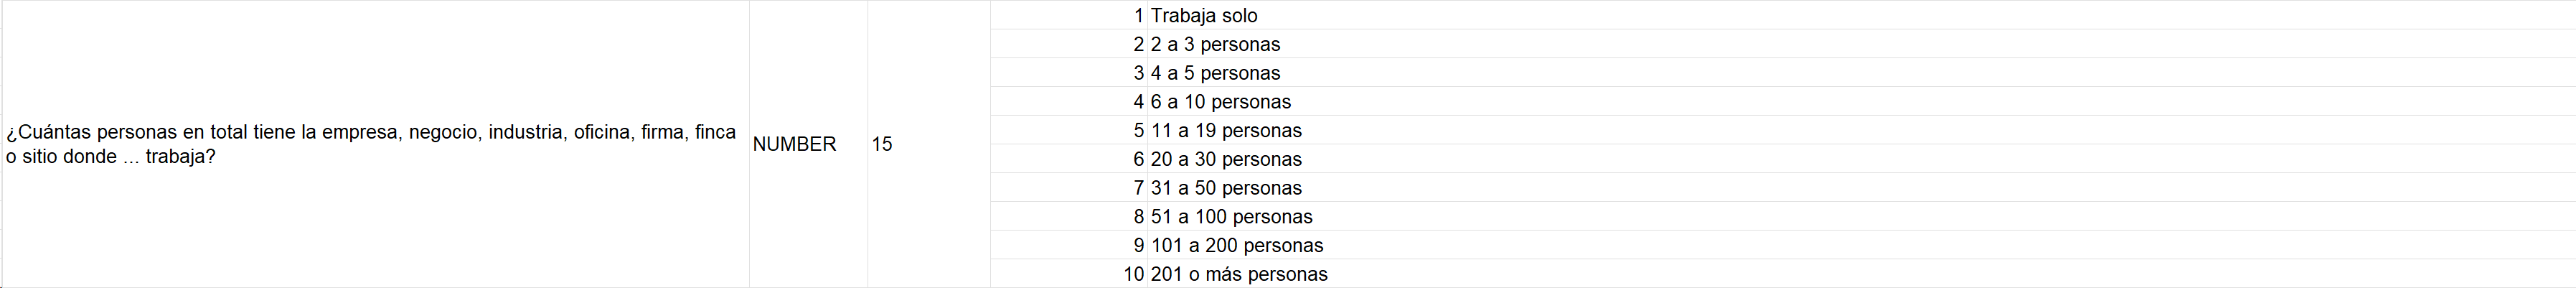

In [280]:
weighted_avg = (emicron_nat['P3069'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3069 in emicron_nat:", weighted_avg)

Weighted average of P3069 in emicron_nat: 1.3787081367647807


In [395]:
# Group by the values in P3069 and calculate the weighted sum for each group
weighted_distribution = emicron_nat.groupby('P3069')['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P3069', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df)

   P3069  Weighted Distribution
0    1.0               0.760163
1    2.0               0.180136
2    3.0               0.033342
3    4.0               0.015044
4    5.0               0.001084
5    6.0               0.000969
6    7.0               0.001085
7    8.0               0.000969
8    9.0               0.000590
9   10.0               0.006618


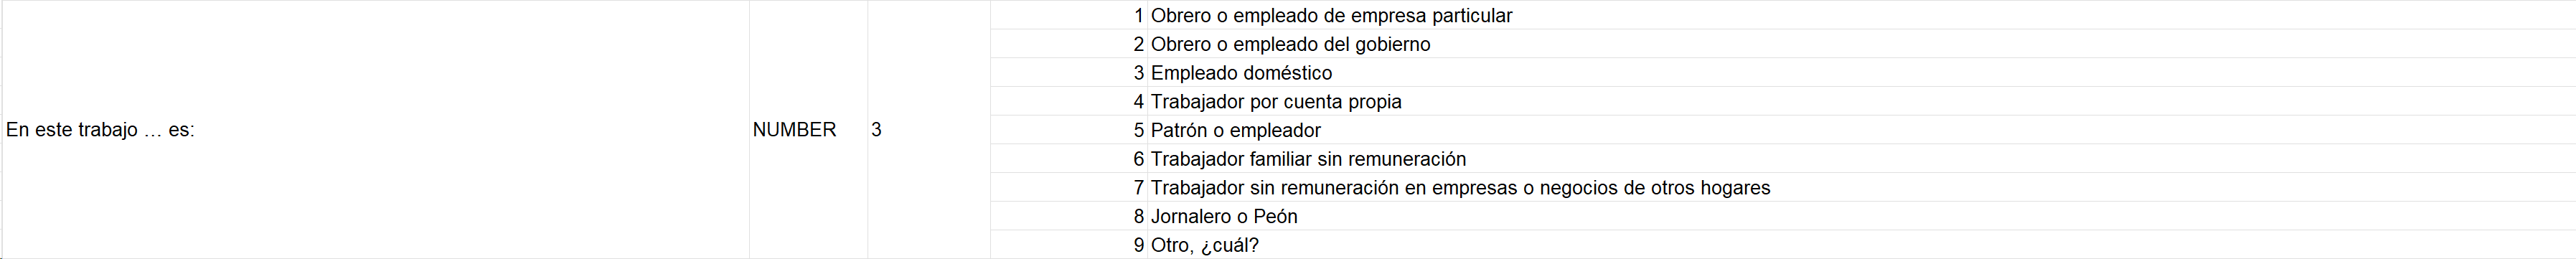

In [281]:
weighted_avg = (emicron_nat['P6430'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P6430 in emicron_nat:", weighted_avg)

Weighted average of P6430 in emicron_nat: 4.068850522776871


In [396]:
# Group by the values in P3069 and calculate the weighted sum for each group
weighted_distribution = emicron_nat.groupby('P6430')['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P6430', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df)

   P6430  Weighted Distribution
0    1.0               0.013215
1    2.0               0.001402
2    3.0               0.001505
3    4.0               0.876125
4    5.0               0.105315
5    7.0               0.002259
6    8.0               0.000179


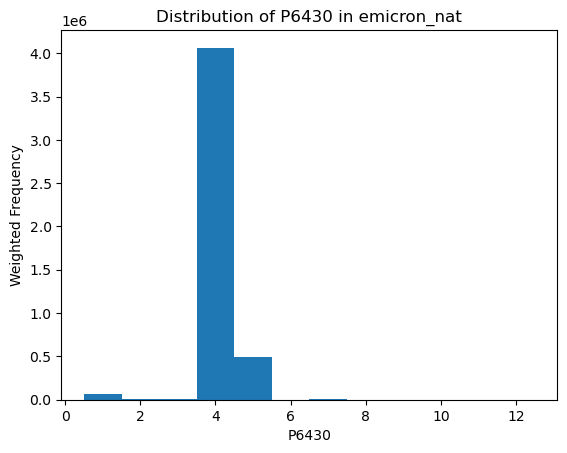

In [394]:
import matplotlib.pyplot as plt

# Plot the distribution
plt.hist(emicron_nat['P6430'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P6430')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P6430 in emicron_nat')

# Show the plot
plt.show()

*7040:*
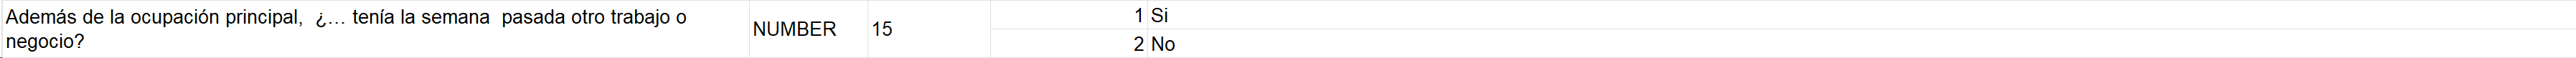

In [282]:
weighted_avg = (emicron_nat['P7040'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P7040 in emicron_nat:", weighted_avg)

Weighted average of P7040 in emicron_nat: 1.9043818428748656


*6440: 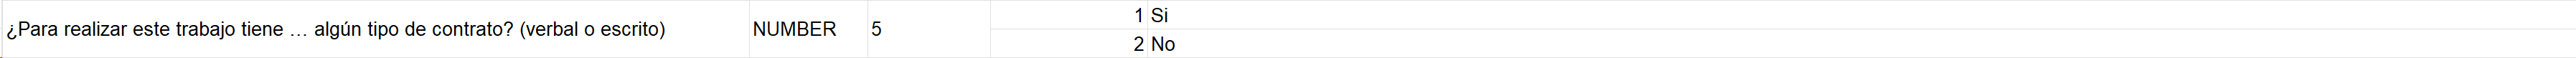*

In [283]:
weighted_avg = (emicron_nat['P6440'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P6440 in emicron_nat:", weighted_avg)

Weighted average of P6440 in emicron_nat: 1.9577896516691153


*monthly compensation of all workers*

In [284]:
weighted_avg = (emicron_nat['REMUNERACION_TOTAL'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of REMUNERACION_TOTAL in emicron_nat:", weighted_avg)

Weighted average of REMUNERACION_TOTAL in emicron_nat: 252704.57051812077


*registered in Chamber of Commerce?*

In [285]:
weighted_avg = (emicron_nat['P1055'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P1055 in emicron_nat:", weighted_avg)

Weighted average of P1055 in emicron_nat: 1.8833559830803024


*Sales last month*

In [286]:
weighted_avg = (emicron_nat['VENTAS_MES_ANTERIOR'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of VENTAS_MES_ANTERIOR in emicron_nat:", weighted_avg)

Weighted average of VENTAS_MES_ANTERIOR in emicron_nat: 2640124.793342427


*P3017_B: costs of electricity*

In [287]:
weighted_avg = (emicron_nat['P3017_B'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3017_B in emicron_nat:", weighted_avg)

Weighted average of P3017_B in emicron_nat: 31301.756852737377


*P3017_G: costs of transport*

In [288]:
weighted_avg = (emicron_nat['P3017_G'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3017_G in emicron_nat:", weighted_avg)

Weighted average of P3017_G in emicron_nat: 58250.41650615377


*P3010: if the business is part of Veeduria ciudadana*

In [289]:
weighted_avg = (emicron_nat['P3010'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3010 in emicron_nat:", weighted_avg)

Weighted average of P3010 in emicron_nat: 1.9998448986577284


*P3012: if the business is part of an environmental group*

In [290]:
weighted_avg = (emicron_nat['P3012'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3012 in emicron_nat:", weighted_avg)

Weighted average of P3012 in emicron_nat: 1.9996761220663284


*Registered at RUT*

In [292]:
weighted_avg = (emicron_nat['P1633'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P1633 in emicron_nat:", weighted_avg)

Weighted average of P1633 in emicron_nat: 1.7625781864572874


In [397]:
# Filter rows where P1633 is 2
filtered_rows = emicron_nat[emicron_nat['P1633'] == 2]

# Calculate the weighted sum of the filtered rows
weighted_sum_filtered = (filtered_rows['F_EXP']).sum()

# Calculate the total weighted sum
total_weighted_sum = emicron_nat['F_EXP'].sum()

# Calculate the share
share_of_rows = weighted_sum_filtered / total_weighted_sum

print("Share of rows where value of P1633 is 2:", share_of_rows)

Share of rows where value of P1633 is 2: 0.7625781864572875


*What financial register is used. val 3 and 5 would be informal*

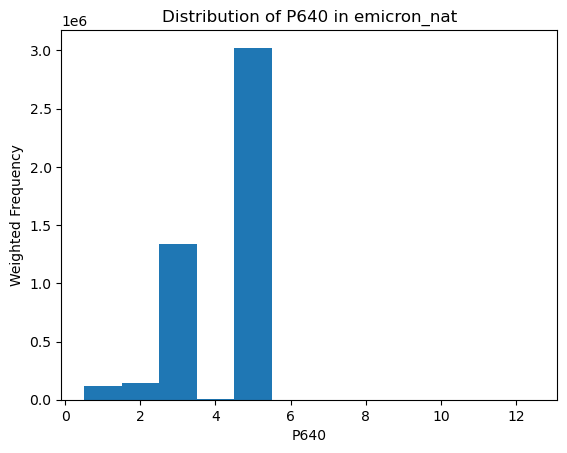

In [293]:
import matplotlib.pyplot as plt

# Plot the distribution
plt.hist(emicron_nat['P640'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P640')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P640 in emicron_nat')

# Show the plot
plt.show()

In [398]:
# Group by the values in P3069 and calculate the weighted sum for each group
weighted_distribution = emicron_nat.groupby('P640')['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P640', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df)

   P640  Weighted Distribution
0     1               0.025983
1     2               0.031614
2     3               0.288458
3     4               0.002052
4     5               0.651894


*how many people work in the business*

In [294]:
weighted_avg = (emicron_nat['P3091'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3091 in emicron_nat:", weighted_avg)

Weighted average of P3091 in emicron_nat: 1.3596587397060025


*whether you are a business owner (1) or a freelancer (2)*

In [295]:
weighted_avg = (emicron_nat['P3033'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3033 in emicron_nat:", weighted_avg)

Weighted average of P3033 in emicron_nat: 1.8775643749311866


*average monthly consumption*

In [296]:
weighted_avg = (emicron_nat['CONSUMO_INTERMEDIO'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of CONSUMO_INTERMEDIO in emicron_nat:", weighted_avg)

Weighted average of CONSUMO_INTERMEDIO in emicron_nat: 1675639.3763995587


*does the business have a commercial name? 1 yes 2 no*

In [297]:
weighted_avg = (emicron_nat['P3035'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3035 in emicron_nat:", weighted_avg)

Weighted average of P3035 in emicron_nat: 1.8265294872967384


*social benefits paid per month*

In [298]:
weighted_avg = (emicron_nat['PRESTACIONES'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of PRESTACIONES in emicron_nat:", weighted_avg)

Weighted average of PRESTACIONES in emicron_nat: 65303.84033804606


*if anyone helps in the business*

In [299]:
weighted_avg = (emicron_nat['P3031'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3031 in emicron_nat:", weighted_avg)

Weighted average of P3031 in emicron_nat: 1.7785346653286347


*does the business use technological devices?*

In [300]:
weighted_avg = (emicron_nat['P4001'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P4001 in emicron_nat:", weighted_avg)

Weighted average of P4001 in emicron_nat: 1.889475740139715


*COSTOS_MES_ANTERIOR*

In [301]:
weighted_avg = (emicron_nat['COSTOS_MES_ANTERIOR'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of COSTOS_MES_ANTERIOR in emicron_nat:", weighted_avg)

Weighted average of COSTOS_MES_ANTERIOR in emicron_nat: 1298002.0714001295


*have paid ARL?*

In [302]:
weighted_avg = (emicron_nat['P3090'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3090 in emicron_nat:", weighted_avg)

Weighted average of P3090 in emicron_nat: 1.9360489531747966


*does the business have internet?*

In [303]:
weighted_avg = (emicron_nat['P2524'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P2524 in emicron_nat:", weighted_avg)

Weighted average of P2524 in emicron_nat: 1.5950300146122798


*average monthly sales*

In [304]:
weighted_avg = (emicron_nat['P3072'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3072 in emicron_nat:", weighted_avg)

Weighted average of P3072 in emicron_nat: 820363.468306965


*average monthly costs*

In [305]:
weighted_avg = (emicron_nat['GASTOS_MES'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of GASTOS_MES in emicron_nat:", weighted_avg)

Weighted average of GASTOS_MES in emicron_nat: 375487.76242915046


*do you have email?*

In [306]:
weighted_avg = (emicron_nat['P3000'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3000 in emicron_nat:", weighted_avg)

Weighted average of P3000 in emicron_nat: 1.8939550779205798


*social network?*

In [307]:
weighted_avg = (emicron_nat['P1559'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P1559 in emicron_nat:", weighted_avg)

Weighted average of P1559 in emicron_nat: 1.890290972561031


*do you have a telephone*

In [308]:
weighted_avg = (emicron_nat['P976'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P976 in emicron_nat:", weighted_avg)

Weighted average of P976 in emicron_nat: 1.3425168689580131


*do you pay SENA or ICBF*

In [309]:
weighted_avg = (emicron_nat['P2989'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P2989 in emicron_nat:", weighted_avg)

Weighted average of P2989 in emicron_nat: 1.9763742435890808


*did you pay healthcare or pension last month?*

In [310]:
weighted_avg = (emicron_nat['P3088'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3088 in emicron_nat:", weighted_avg)

Weighted average of P3088 in emicron_nat: 1.9506745573198874


*added value monthly*

In [311]:
weighted_avg = (emicron_nat['VALOR_AGREGADO'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of VALOR_AGREGADO in emicron_nat:", weighted_avg)

Weighted average of VALOR_AGREGADO in emicron_nat: 964485.4169428688


*which industrial category? 12*
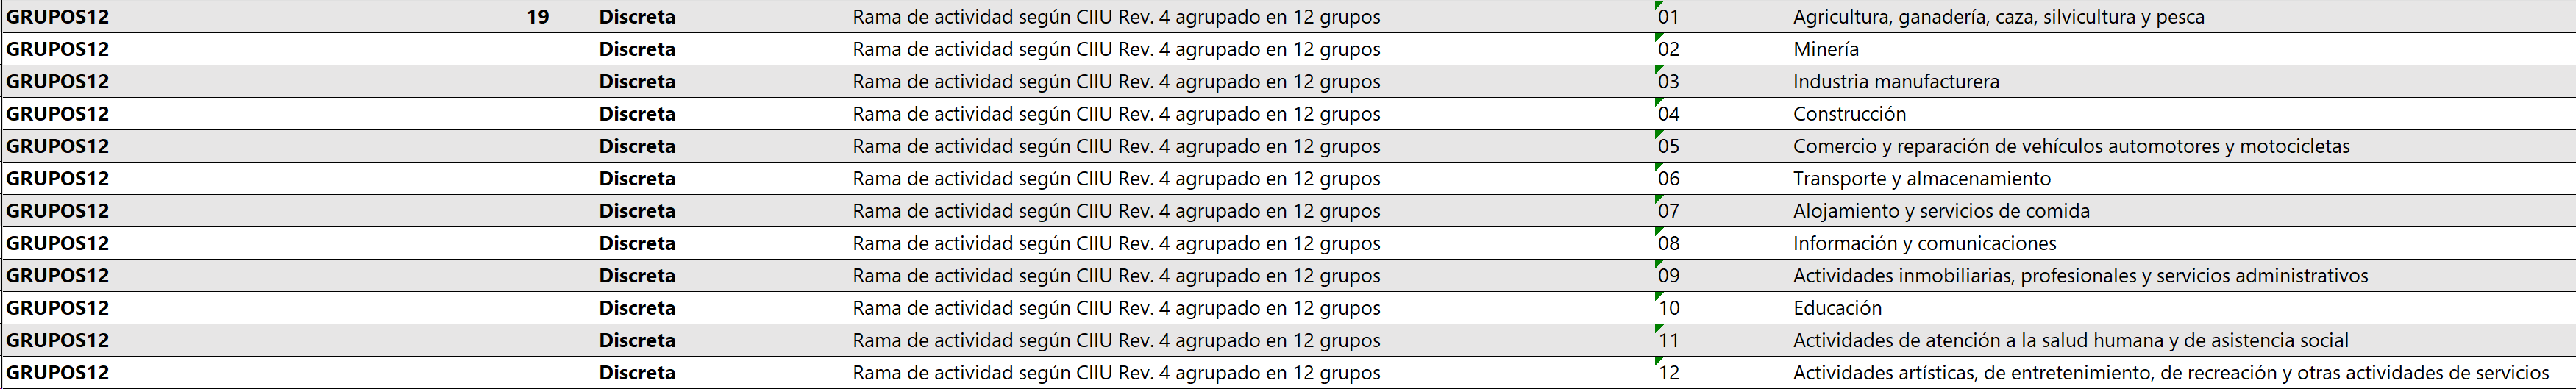

In [400]:
# Group by the values in P3069 and calculate the weighted sum for each group
weighted_distribution = emicron_nat.groupby('GRUPOS12')['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['GRUPOS12', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df.sort_values(by='Weighted Distribution', ascending=False))

    GRUPOS12  Weighted Distribution
4          5               0.256835
0          1               0.220503
5          6               0.108974
2          3               0.107246
11        12               0.086143
6          7               0.078549
3          4               0.059816
8          9               0.047420
10        11               0.011004
1          2               0.010214
9         10               0.006721
7          8               0.006295
12        13               0.000281


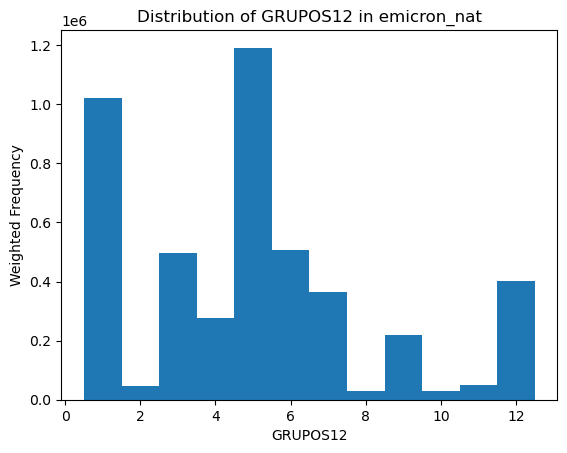

In [312]:
# Plot the distribution
plt.hist(emicron_nat['GRUPOS12'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('GRUPOS12')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of GRUPOS12 in emicron_nat')

# Show the plot
plt.show()

*which industrial category? 4*
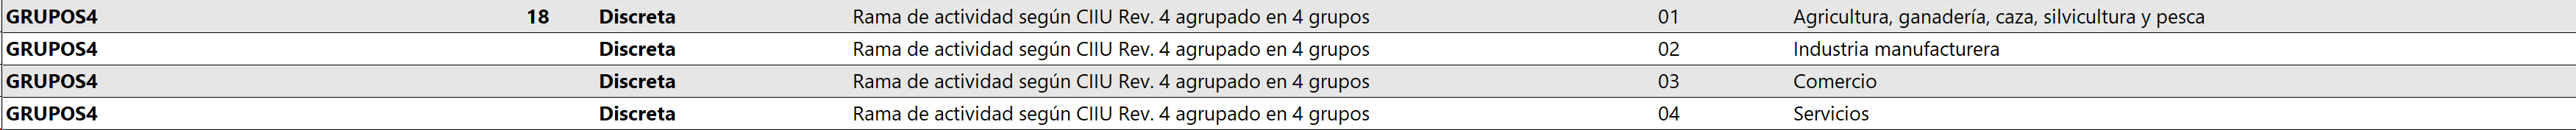

In [401]:
# Group by the values in P3069 and calculate the weighted sum for each group
weighted_distribution = emicron_nat.groupby('GRUPOS4')['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['GRUPOS4', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df.sort_values(by='Weighted Distribution', ascending=False))

   GRUPOS4  Weighted Distribution
3        4               0.404922
2        3               0.256835
0        1               0.230717
1        2               0.107246
4        5               0.000281


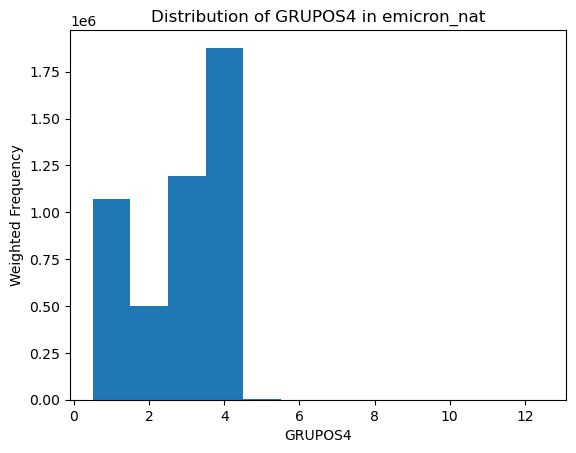

In [313]:
# Plot the distribution
plt.hist(emicron_nat['GRUPOS4'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('GRUPOS4')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of GRUPOS4 in emicron_nat')

# Show the plot
plt.show()

*Municipal Head Offices*

*Populated Centres and Dispersed Rural Areas*

In [402]:
# Group by the values in P3069 and calculate the weighted sum for each group
weighted_distribution = emicron_nat.groupby('CLASE_TE')['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['CLASE_TE', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df.sort_values(by='Weighted Distribution', ascending=False))

   CLASE_TE  Weighted Distribution
0         1                 0.6884
1         2                 0.3116


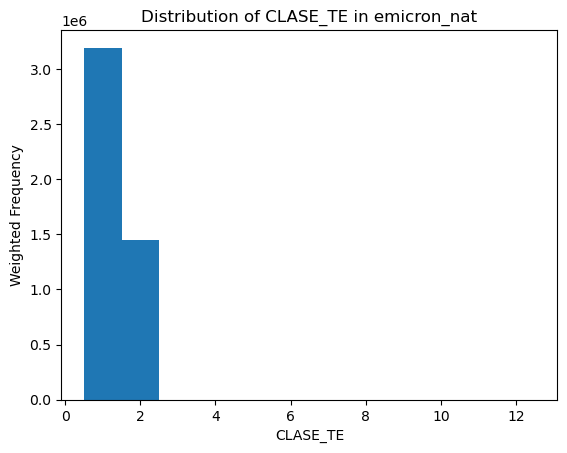

In [314]:
import matplotlib.pyplot as plt

# Plot the distribution
plt.hist(emicron_nat['CLASE_TE'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('CLASE_TE')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of CLASE_TE in emicron_nat')

# Show the plot
plt.show()

*P3373: where born*
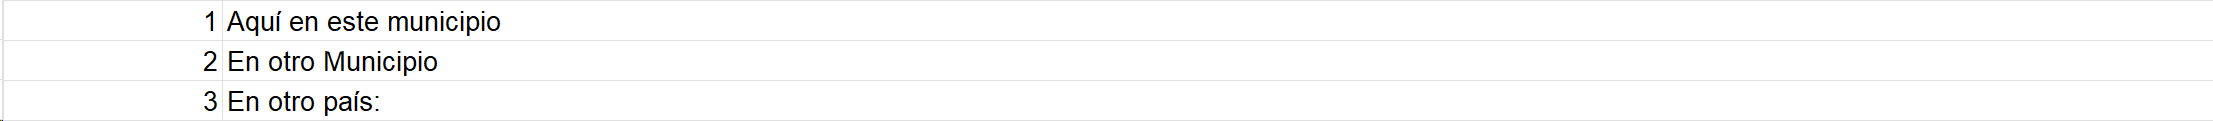

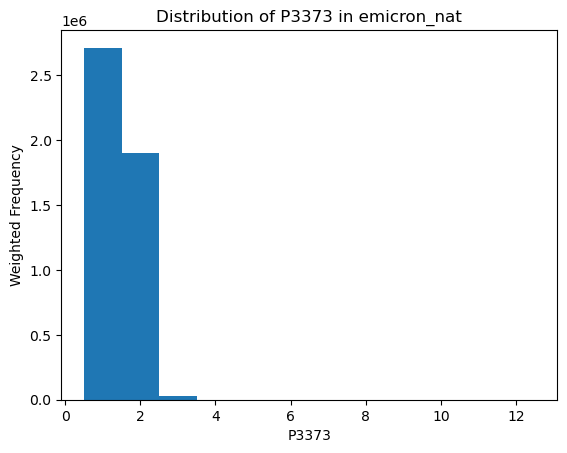

In [315]:
# Plot the distribution
plt.hist(emicron_nat['P3373'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P3373')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P3373 in emicron_nat')

# Show the plot
plt.show()

*urban: if 1 they are in city, if 0 rural area*

In [403]:
weighted_avg = (emicron_nat['urban'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of urban in emicron_nat:", weighted_avg)

Weighted average of urban in emicron_nat: 0.6504675387771719


*P3374: nationality*
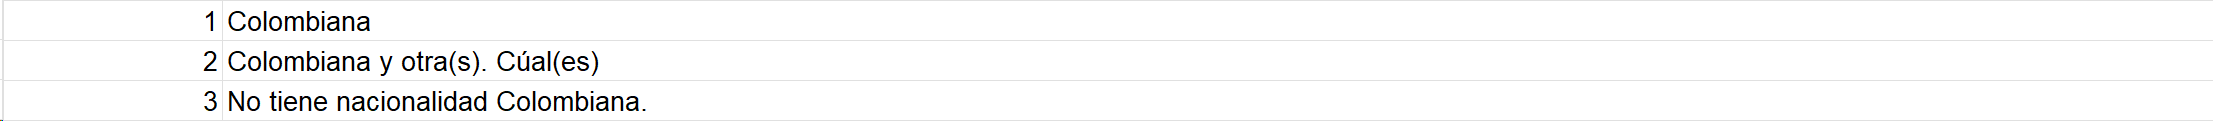

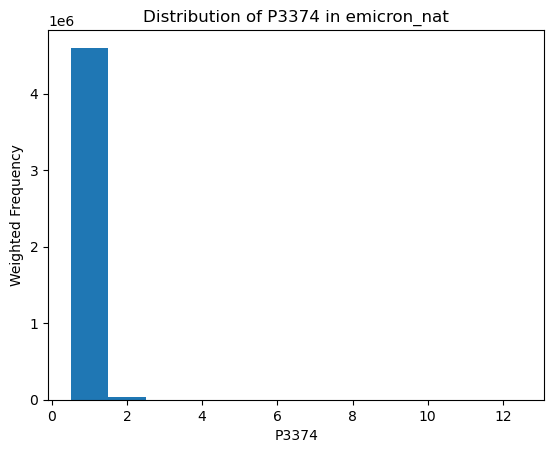

In [318]:
# Plot the distribution
plt.hist(emicron_nat['P3374'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P3374')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P3374 in emicron_nat')

# Show the plot
plt.show()

*establishment of business (physical location)*

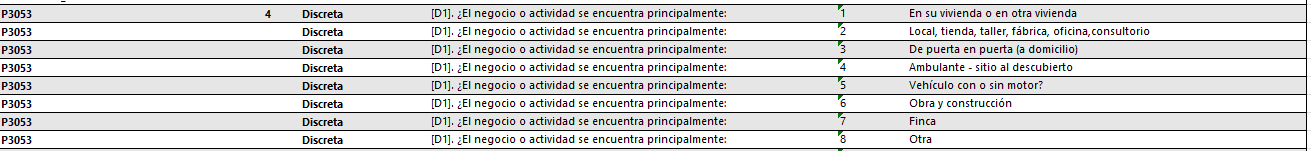

In [404]:
# Group by the values in P3069 and calculate the weighted sum for each group
weighted_distribution = emicron_nat.groupby('P3053')['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P3053', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df.sort_values(by='Weighted Distribution', ascending=False))

   P3053  Weighted Distribution
0      1               0.273789
2      3               0.199198
6      7               0.152891
1      2               0.131530
4      5               0.107257
3      4               0.080095
7      8               0.030717
5      6               0.024524


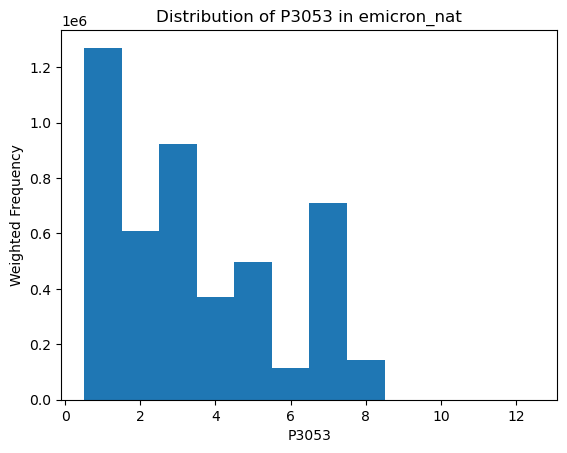

In [319]:
# Plot the distribution
plt.hist(emicron_nat['P3053'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P3053')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P3053 in emicron_nat')

# Show the plot
plt.show()

*how many months have you been working in this establishment?*

In [320]:
weighted_avg = (emicron_nat['P3034'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P3034 in emicron_nat:", weighted_avg)

Weighted average of P3034 in emicron_nat: 144.86357580554548


*How much time has this business working?*

In [321]:
weighted_avg = (emicron_nat['P639'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P639 in emicron_nat:", weighted_avg)

Weighted average of P639 in emicron_nat: 3.8123715288125806


*age of the owner*

In [322]:
weighted_avg = (emicron_nat['P241'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of P241 in emicron_nat:", weighted_avg)

Weighted average of P241 in emicron_nat: 46.04435301492059


*geographical location*
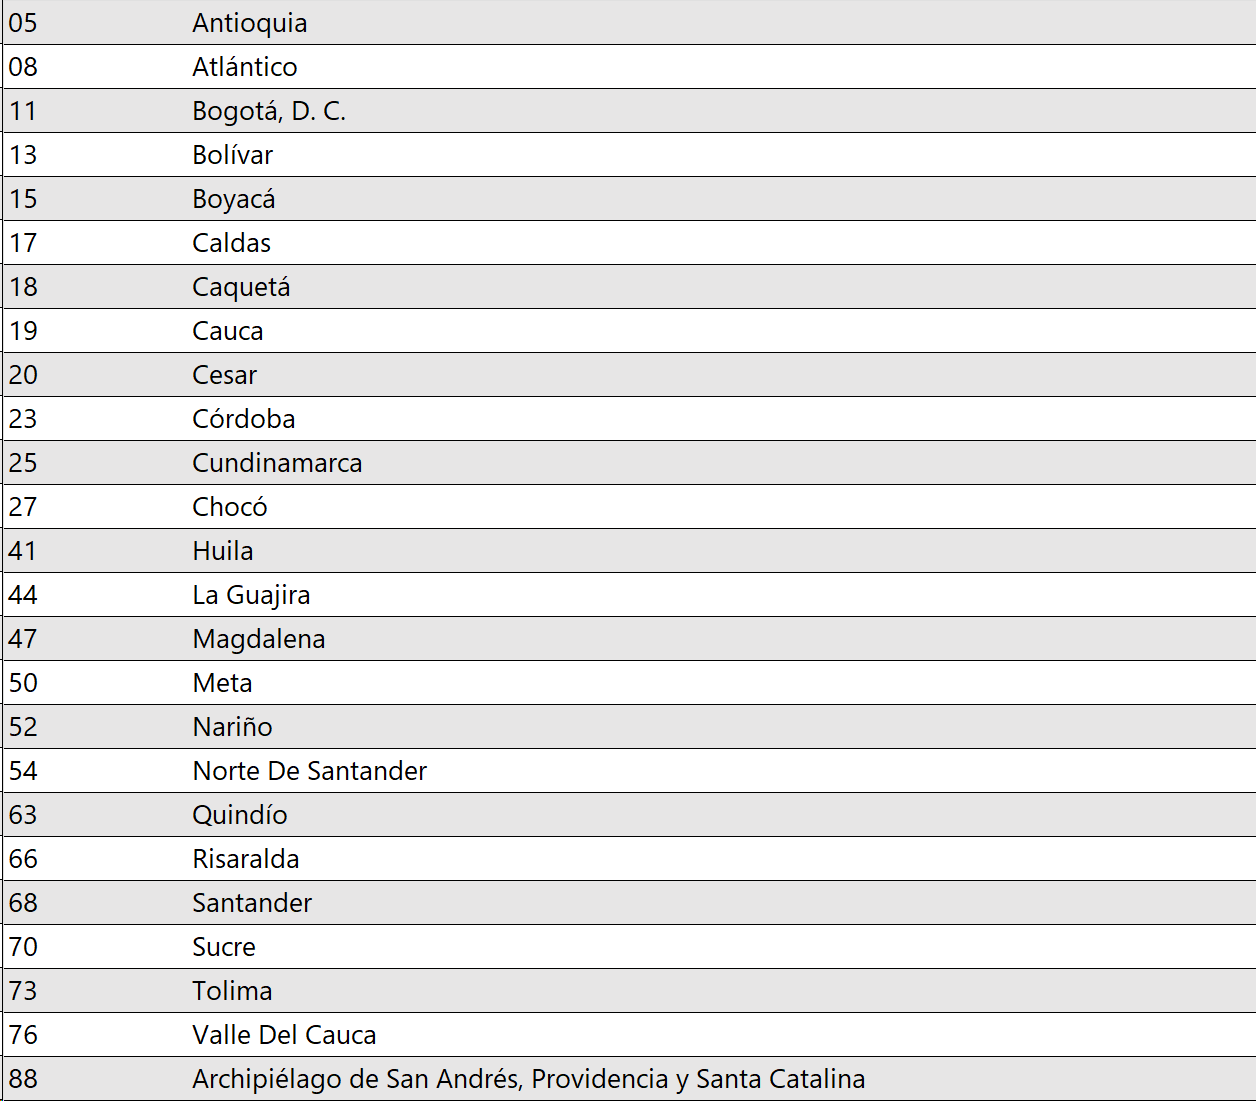

In [323]:
weighted_freq = emicron_nat.groupby('COD_DEPTO')['F_EXP'].sum().sort_values(ascending=False)
print(weighted_freq)

COD_DEPTO
5     581176.355592
11    411494.796108
76    411431.233416
52    389098.043034
8     331118.378893
13    322082.829046
23    259066.376274
68    221248.833785
47    191695.741466
70    173535.034441
25    160700.601045
19    157994.283017
44    134208.770285
15    129460.913270
20    116814.913972
73    111466.644633
54    111203.676828
41     94845.872481
50     79632.782733
17     75611.530358
66     65274.874090
18     40937.683673
63     35635.685551
27     29587.833894
88      2365.953814
Name: F_EXP, dtype: float64


*P3051*
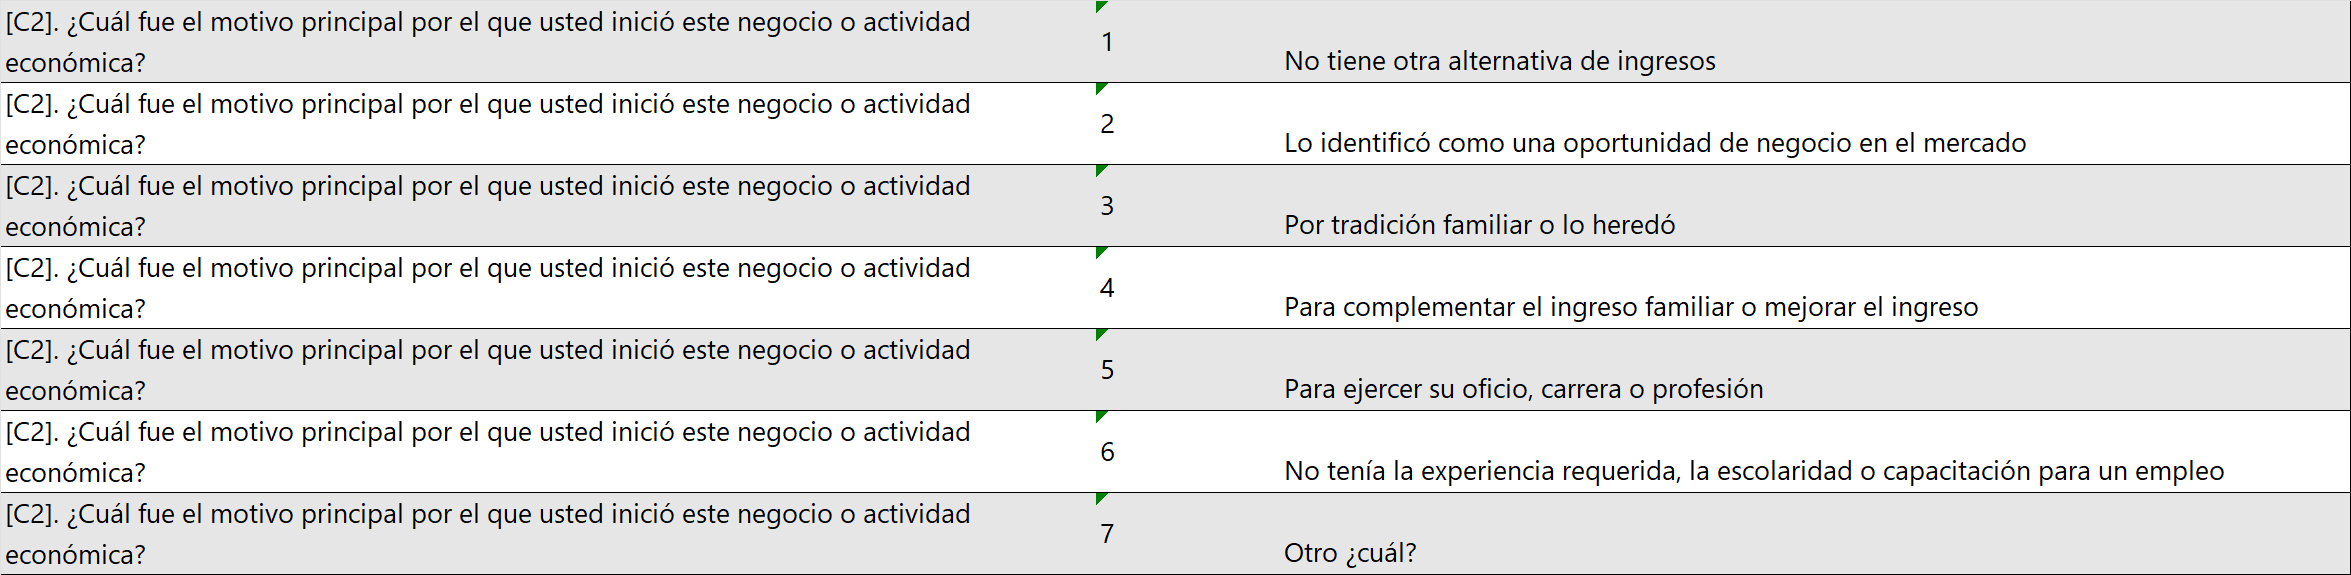

In [324]:
emicron_nat['bad_reason_create_business'] = emicron_nat['P3051'].apply(lambda x: 1 if x in [1, 6] else 0)

In [326]:
weighted_avg = (emicron_nat['bad_reason_create_business'] * emicron_nat['F_EXP']).sum() / emicron_nat['F_EXP'].sum()
print("Weighted average of bad_reason_create_business in emicron_nat:", weighted_avg)

Weighted average of bad_reason_create_business in emicron_nat: 0.388070838827783


*P3374: nationality*
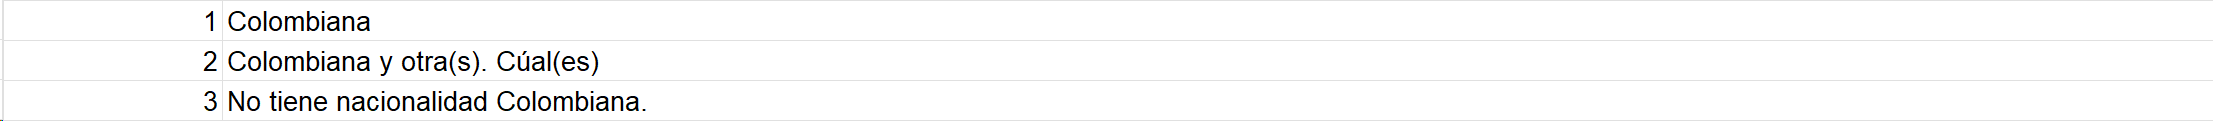

*P3052*
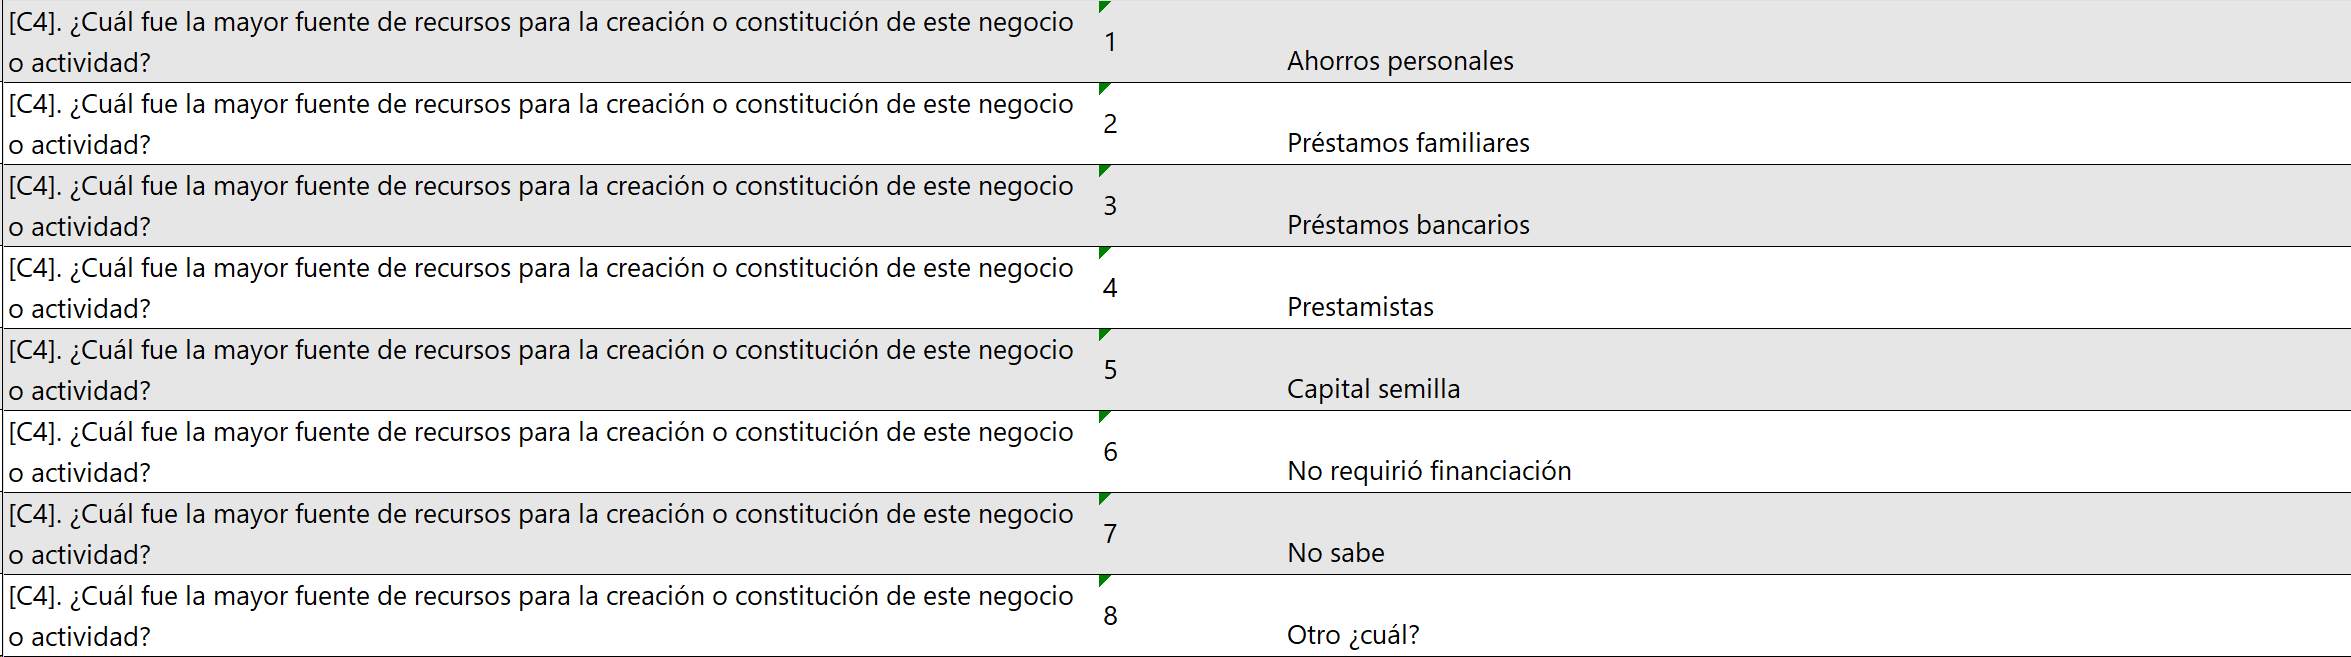

finance is 1 if formal and 0 if informal

In [408]:
emicron_nan = {}

In [409]:
modulo_emprendimiento = pd.read_csv("../../../Data/Emicron-2022/Módulo de emprendimiento.csv")

In [410]:
emicron_nan = pd.merge(emicron_nat, modulo_emprendimiento, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P", "CLASE_TE", "COD_DEPTO", "F_EXP"], how='left')

In [411]:
# Group by the values in P3069 and calculate the weighted sum for each group
weighted_distribution = emicron_nan.groupby('P3052')['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P3052', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df.sort_values(by='Weighted Distribution', ascending=False))

   P3052  Weighted Distribution
0    1.0               0.601417
5    6.0               0.149747
1    2.0               0.110840
2    3.0               0.095469
3    4.0               0.027169
7    8.0               0.012143
4    5.0               0.002541
6    7.0               0.000674


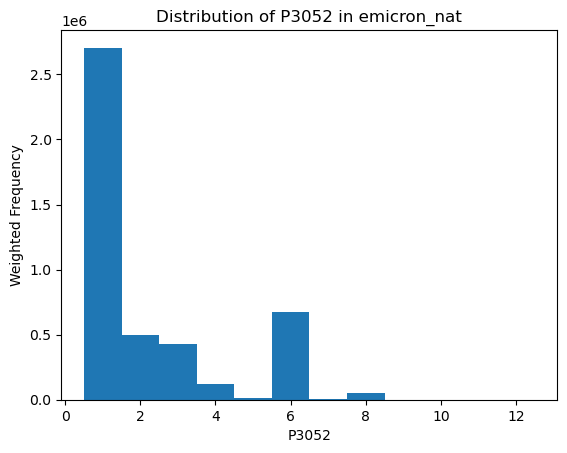

In [412]:
# Plot the distribution
plt.hist(emicron_nan['P3052'], weights=emicron_nan['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P3052')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P3052 in emicron_nat')

# Show the plot
plt.show()

*P994*

They don't need them
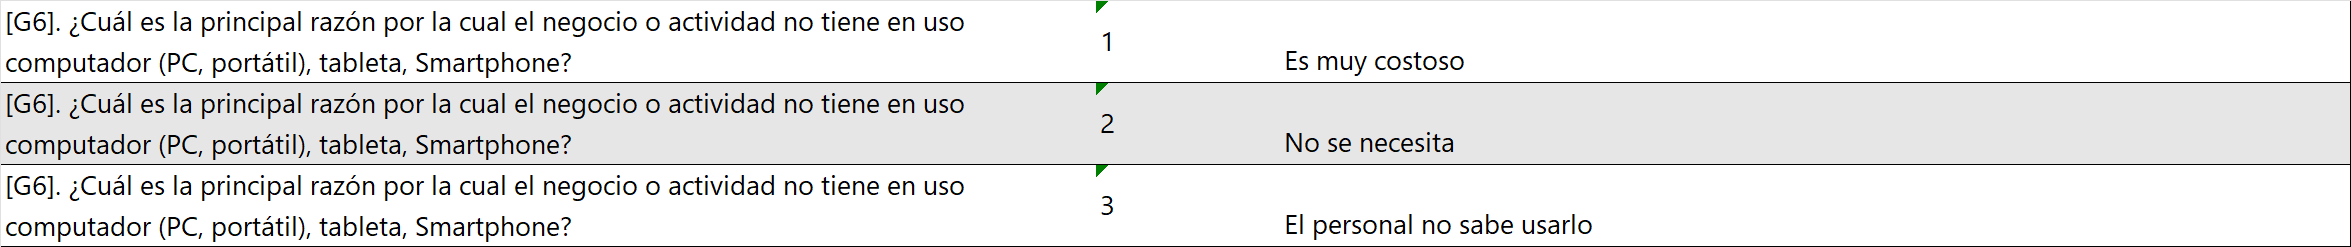

1 means they don't need it

In [413]:
emicron_nan = {}

In [414]:
modulo_TIC = pd.read_csv("../../../Data/Emicron-2022/Módulo de TIC.csv")

In [415]:
emicron_nan = pd.merge(emicron_nat, modulo_TIC, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P", "CLASE_TE", "COD_DEPTO", "F_EXP"], how='left')

In [416]:
emicron_nan['why_not_tech'] = emicron_nan['P994'].isin([2]).astype(int)

In [417]:
weighted_avg = (emicron_nan['why_not_tech'] * emicron_nan['F_EXP']).sum() / emicron_nan['F_EXP'].sum()
print("Weighted average of why_not_tech in emicron_nat:", weighted_avg)

Weighted average of why_not_tech in emicron_nat: 0.32051182821890134


In [418]:
# Group by the values in P3069 and calculate the weighted sum for each group
weighted_distribution = emicron_nan.groupby('P994')['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P994', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df.sort_values(by='Weighted Distribution', ascending=False))

   P994  Weighted Distribution
1   2.0               0.943422
2   3.0               0.029564
0   1.0               0.027013


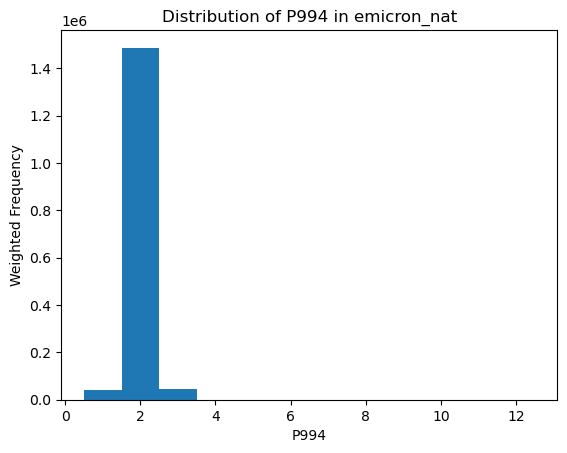

In [349]:
# Plot the distribution
plt.hist(emicron_nan['P994'], weights=emicron_nan['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P994')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P994 in emicron_nat')

# Show the plot
plt.show()

*P1093: do you use internet?*

In [420]:
emicron_nan = {}

In [421]:
emicron_nan = pd.merge(emicron_nat, modulo_TIC, on=['DIRECTORIO', 'SECUENCIA_ENCUESTA', 'SECUENCIA_P', 'CLASE_TE', 'COD_DEPTO', 'F_EXP'], how='inner')

In [422]:
weighted_avg = (emicron_nan['P1093'] * emicron_nan['F_EXP']).sum() / emicron_nan['F_EXP'].sum()
print("Weighted average of P1093 in emicron_nat:", weighted_avg)

Weighted average of P1093 in emicron_nat: 0.4155096720038161


In [423]:
# Group by the values in P3069 and calculate the weighted sum for each group
weighted_distribution = emicron_nan.groupby('P1093')['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P1093', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df.sort_values(by='Weighted Distribution', ascending=False))

   P1093  Weighted Distribution
0    1.0               0.973974
1    2.0               0.026026


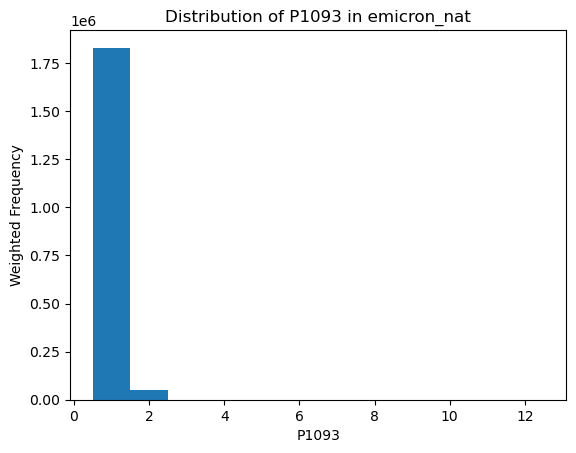

In [353]:
# Plot the distribution
plt.hist(emicron_nan['P1093'], weights=emicron_nan['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P1093')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P1093 in emicron_nat')

# Show the plot
plt.show()

*P3042 edu level*
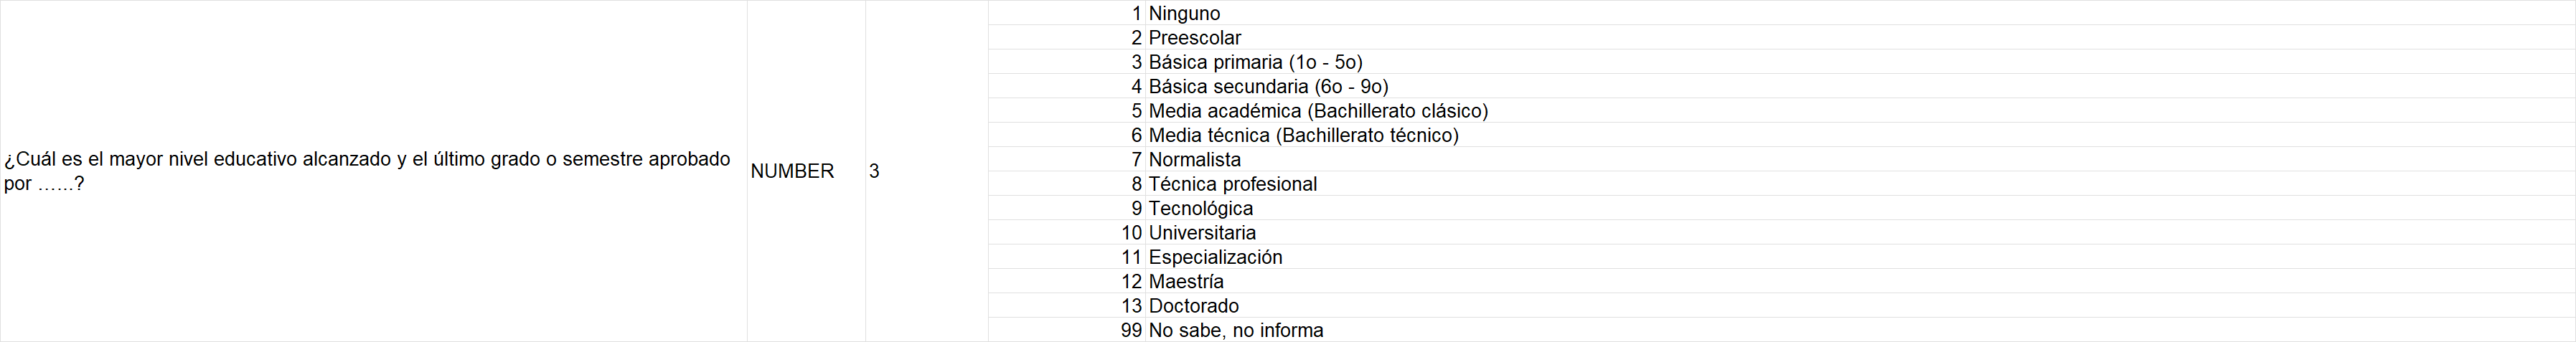

In [354]:
emicron_nan = {}

In [355]:
modulo_individual_geih = pd.read_stata("../../../Outputs/02_household-surveys/individual_geih-2022-clean.dta")

C:\Users\angel\AppData\Local\Temp\ipykernel_9000\1927362092.py:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  modulo_individual_geih = pd.read_stata("../../../Outputs/02_household-surveys/individual_geih-2022-clean.dta")


In [360]:
# Define the old and new column names
rename_cols = {'MES': 'MES_REF', 'CLASE': 'CLASE_TE', 'DPTO': 'COD_DEPTO', 'ORDEN':'SECUENCIA_ENCUESTA'}

# Rename the columns in all dataframes
modulo_individual_geih = modulo_individual_geih.rename(columns=rename_cols)

In [361]:
columns_to_drop = ['PERIODO', 'PER', 'REGIS', 'CLASE_TE', 'COD_DEPTO', 'MES_REF', 'id_house', 'FEX_C18', 'HOGAR', 'adj_weight', 'P3091', 'P3089', 'P3095', 'P3096', 'P3098', 'P3099', 'P3093']

modulo_individual_geih = modulo_individual_geih.drop(columns_to_drop, axis=1, errors='ignore')

In [362]:
modulo_individual_geih["DIRECTORIO"] = modulo_individual_geih["DIRECTORIO"].astype('int64')
modulo_individual_geih["SECUENCIA_P"] = modulo_individual_geih["SECUENCIA_P"].astype('int64')
modulo_individual_geih["SECUENCIA_ENCUESTA"] = modulo_individual_geih["SECUENCIA_ENCUESTA"].astype('int64')

In [363]:
# Define the columns you want to merge
merge_cols = ["DIRECTORIO", "SECUENCIA_P", 'SECUENCIA_ENCUESTA']

# Merge the first dataset
emicron_merge = pd.merge(emicron_nat, modulo_individual_geih, on=merge_cols, how='inner')

In [439]:
# Group by the values in P3069 and calculate the weighted sum for each group
weighted_distribution = emicron_merge.groupby('P3042')['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P3042', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df.sort_values(by='Weighted Distribution', ascending=False))

    P3042  Weighted Distribution
2     3.0               0.305439
4     5.0               0.282350
3     4.0               0.130625
9    10.0               0.089641
0     1.0               0.063834
7     8.0               0.059851
8     9.0               0.027489
5     6.0               0.020677
10   11.0               0.013537
11   12.0               0.005001
6     7.0               0.001022
12   13.0               0.000346
1     2.0               0.000148
13   99.0               0.000040


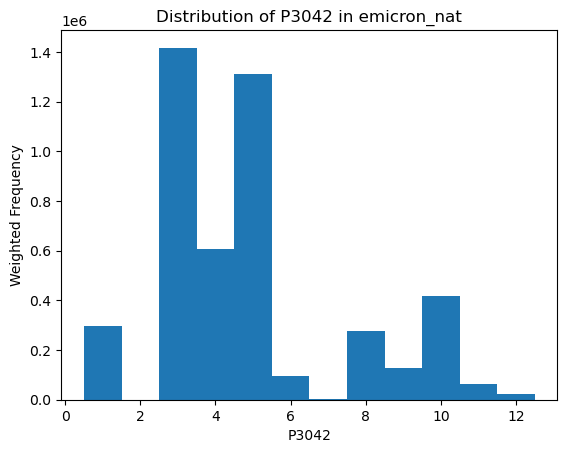

In [364]:
# Plot the distribution
plt.hist(emicron_merge['P3042'], weights=emicron_merge['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P3042')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P3042 in emicron_nat')

# Show the plot
plt.show()

In [380]:
emicron_merge['edu_level_high_school'] = ((emicron_merge['P3042'] >= 5) & (emicron_merge['P3042'] != 99)).astype(int)

In [381]:
weighted_avg = (emicron_merge['edu_level_high_school'] * emicron_merge['F_EXP']).sum() / emicron_merge['F_EXP'].sum()
print("Weighted average of edu_level_high_school in emicron_nat:", weighted_avg)

Weighted average of edu_level_high_school in emicron_nat: 0.49991397864154863


*P3043: edu degree*
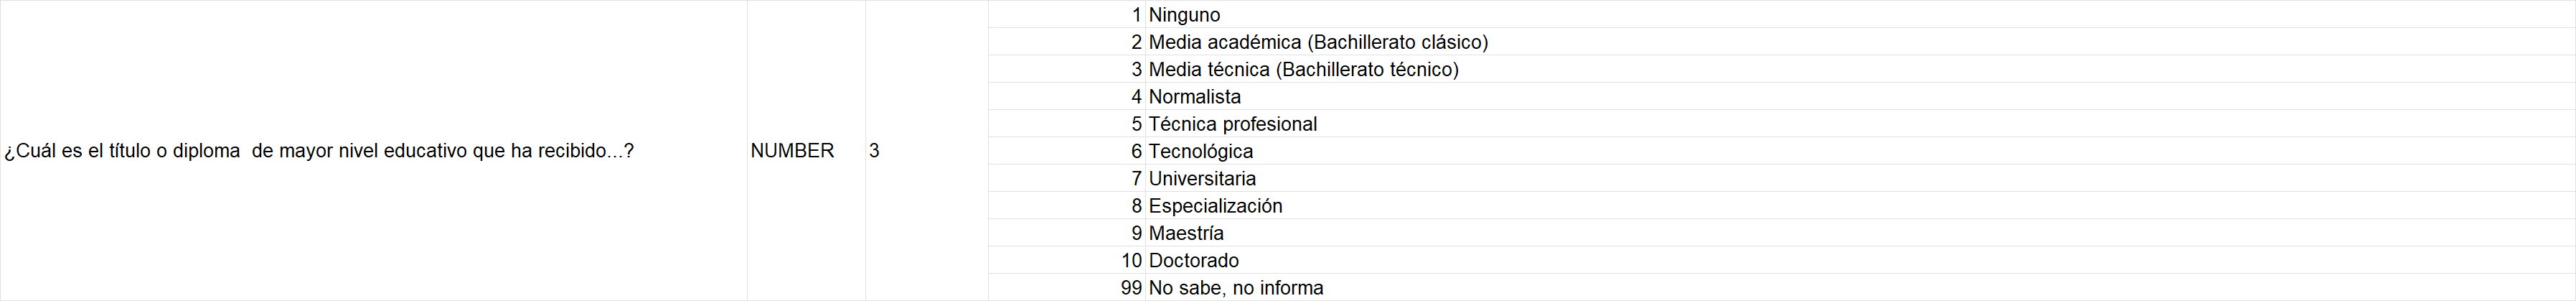

In [425]:
# Group by the values in P3069 and calculate the weighted sum for each group
weighted_distribution = emicron_merge.groupby('P3043')['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P3043', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df.sort_values(by='Weighted Distribution', ascending=False))

   P3043  Weighted Distribution
1    2.0               0.572384
6    7.0               0.143201
4    5.0               0.117027
5    6.0               0.051950
2    3.0               0.046345
0    1.0               0.032096
7    8.0               0.025721
8    9.0               0.008431
3    4.0               0.002266
9   10.0               0.000577


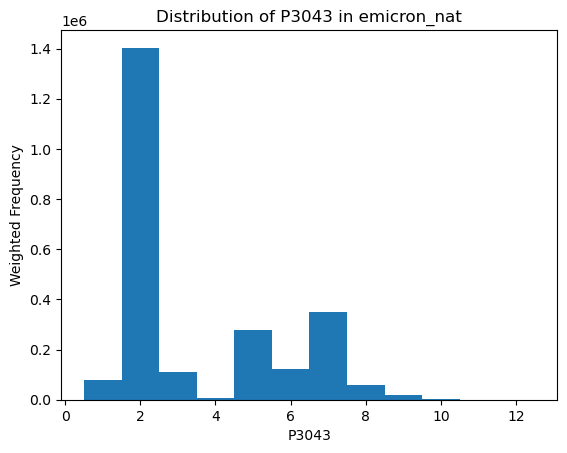

In [251]:
# Plot the distribution
plt.hist(emicron_merge['P3043'], weights=emicron_merge['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P3043')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P3043 in emicron_nat')

# Show the plot
plt.show()

*P3039: gender*
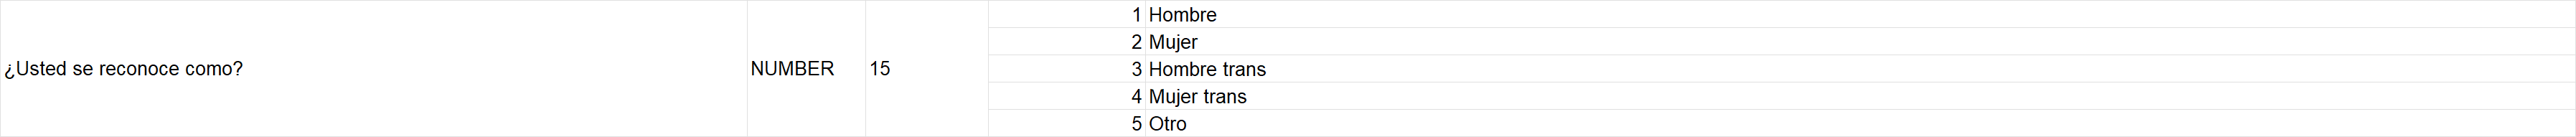

In [426]:
# Group by the values in P3069 and calculate the weighted sum for each group
weighted_distribution = emicron_merge.groupby('P3039')['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P3039', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df.sort_values(by='Weighted Distribution', ascending=False))

   P3039  Weighted Distribution
0    1.0               0.655471
1    2.0               0.343512
2    3.0               0.000598
4    5.0               0.000221
3    4.0               0.000197


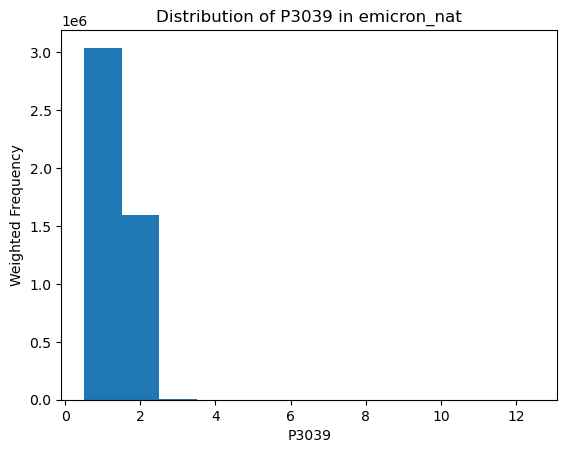

In [382]:
# Plot the distribution
plt.hist(emicron_merge['P3039'], weights=emicron_merge['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P3039')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P3039 in emicron_nat')

# Show the plot
plt.show()

*type of sales*
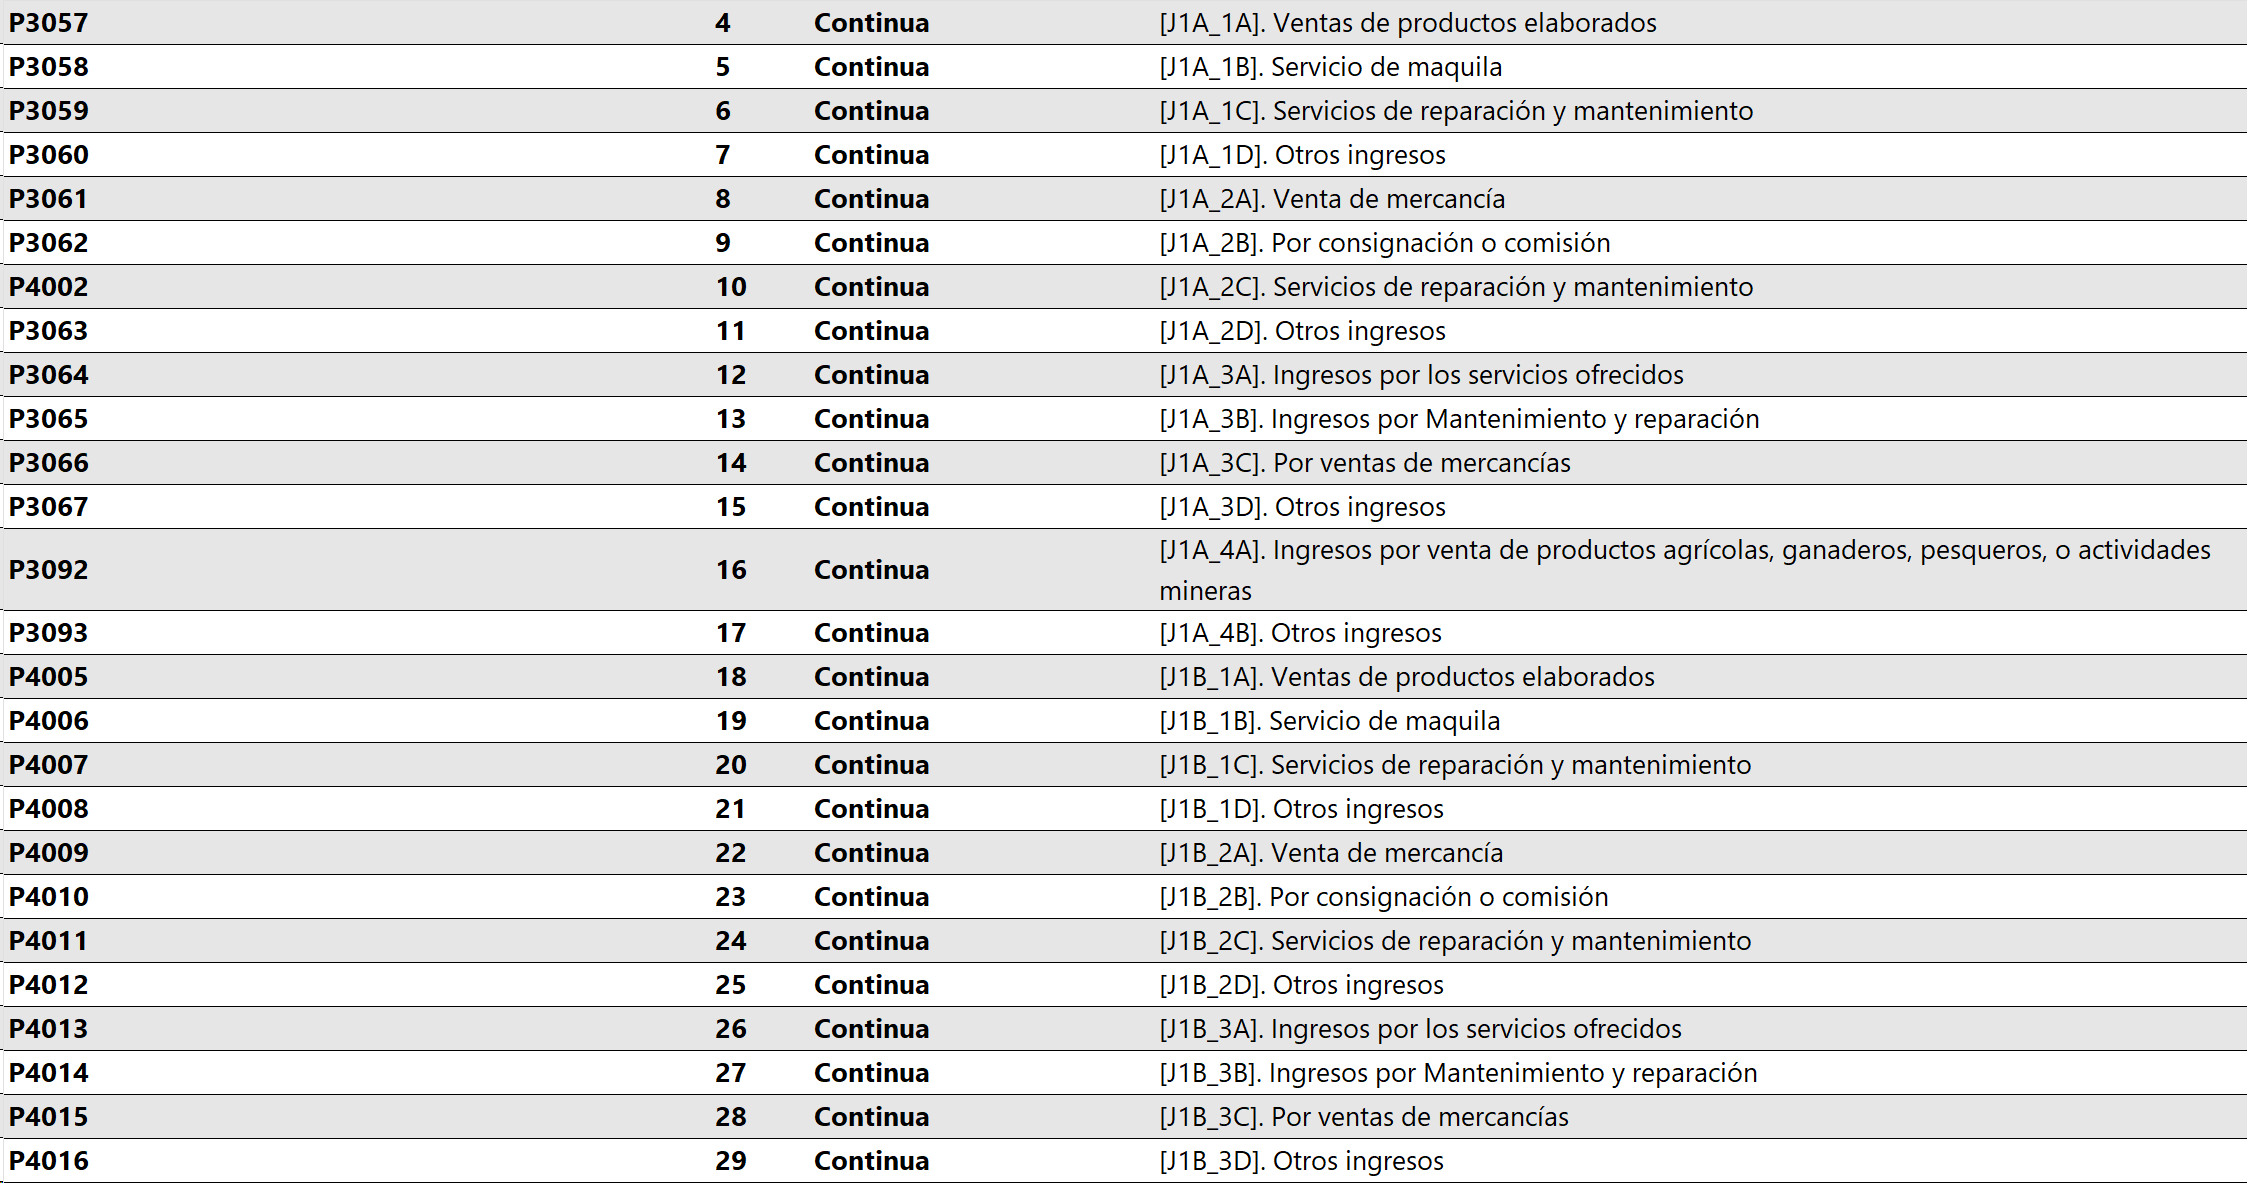

In [429]:
modulo_sales = pd.read_csv("../../../Data/Emicron-2022/Módulo de ventas o ingresos.csv")

In [430]:
emicron_nan = {}

In [431]:
emicron_nan = pd.merge(emicron_nat, modulo_sales, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P", "CLASE_TE", "COD_DEPTO", "F_EXP"], how='left')

In [437]:
columns = ['P3057', 'P3058', 'P3059', 'P3060', 'P3061', 'P3062', 'P3063', 'P3064', 'P3065', 'P3066', 'P3067', 'P3092', 'P3093', 'P4005', 'P4006', 'P4007', 'P4008', 'P4009', 'P4010', 'P4011', 'P4012', 'P4013', 'P4014', 'P4015', 'P4016']

weighted_averages = {}

for column in columns:
    weighted_sum = (emicron_nan[column] * emicron_nan['F_EXP']).sum()
    total_weight = emicron_nan['F_EXP'].sum()
    weighted_average = weighted_sum / total_weight
    weighted_averages[column] = weighted_average

weighted_averages

sorted_weighted_averages = sorted(weighted_averages.items(), key=lambda x: x[1], reverse=True)
sorted_weighted_averages

[('P3061', 1113229.1679015232),
 ('P4009', 951574.0354906907),
 ('P3064', 945850.6925821276),
 ('P4013', 833803.8030112222),
 ('P3092', 309114.43066209235),
 ('P3057', 222217.29697961916),
 ('P4005', 192658.4237673822),
 ('P4014', 14968.560867494478),
 ('P3065', 12894.103085129236),
 ('P3066', 11252.396060860825),
 ('P4015', 10867.688996972576),
 ('P3093', 10647.192506481342),
 ('P3062', 4248.040055143842),
 ('P4010', 3892.9704122264043),
 ('P3058', 3285.229127175792),
 ('P3067', 3166.9666080613383),
 ('P4006', 2646.885001824957),
 ('P4016', 1750.2292452308855),
 ('P3063', 1557.7039415197314),
 ('P3059', 1242.487627163439),
 ('P4007', 1086.9795632708817),
 ('P4012', 1057.5221207461325),
 ('P4011', 628.1512494378029),
 ('P3060', 553.7864662281132),
 ('P4008', 305.48125735230695)]

*MPI*

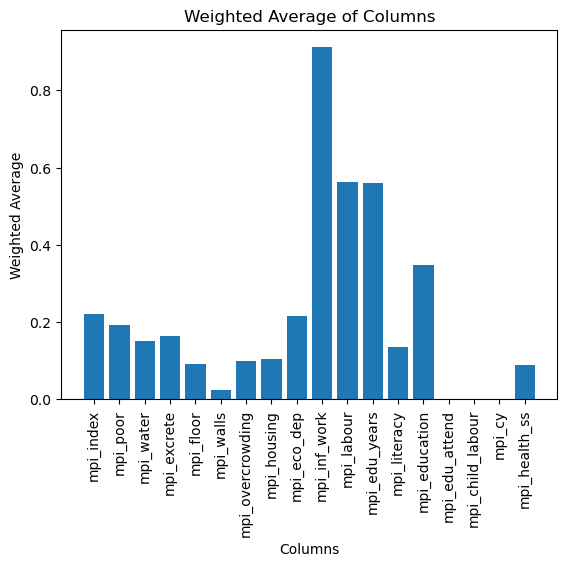

In [389]:
columns_mpi = ['mpi_index',
                    'mpi_poor', 'mpi_water', 'mpi_excrete', 'mpi_floor',
                    'mpi_walls', 'mpi_overcrowding', 'mpi_housing', 'mpi_eco_dep',
                    'mpi_inf_work', 'mpi_labour', 'mpi_edu_years', 'mpi_literacy',
                    'mpi_education', 'mpi_edu_attend', 'mpi_child_labour', 'mpi_cy',
                    'mpi_health_ss']

# Calculate the weighted average for each column
weighted_avg = emicron_nat[columns_mpi].multiply(emicron_nat['F_EXP'], axis=0).sum() / emicron_nat['F_EXP'].sum()

# Plot the weighted average values
plt.bar(weighted_avg.index, weighted_avg.values)

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Weighted Average')
plt.title('Weighted Average of Columns')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [390]:
columns_mpi = ['mpi_index',
               'mpi_poor', 'mpi_water', 'mpi_excrete', 'mpi_floor',
               'mpi_walls', 'mpi_overcrowding', 'mpi_housing', 'mpi_eco_dep',
               'mpi_inf_work', 'mpi_labour', 'mpi_edu_years', 'mpi_literacy',
               'mpi_education', 'mpi_edu_attend', 'mpi_child_labour', 'mpi_cy',
               'mpi_health_ss']

# Calculate the weighted average for each column
weighted_avg = emicron_nat[columns_mpi].multiply(emicron_nat['F_EXP'], axis=0).sum() / emicron_nat['F_EXP'].sum()

# Print the weighted average values
print(weighted_avg)

mpi_index           0.221363
mpi_poor            0.193156
mpi_water           0.149850
mpi_excrete         0.164411
mpi_floor           0.090244
mpi_walls           0.023728
mpi_overcrowding    0.099381
mpi_housing         0.105523
mpi_eco_dep         0.215597
mpi_inf_work        0.911392
mpi_labour          0.563495
mpi_edu_years       0.561439
mpi_literacy        0.134746
mpi_education       0.348093
mpi_edu_attend      0.000000
mpi_child_labour    0.000000
mpi_cy              0.000000
mpi_health_ss       0.089706
dtype: float64


*plotting II and mpi*

In [391]:
emicron_nat['mpi_index_rev'] = 1-emicron_nat['mpi_index']

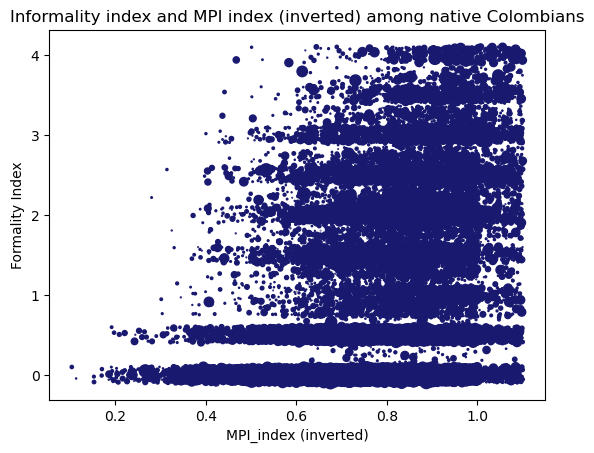

In [392]:
import numpy as np

# Add more random noise to create more dispersion
jitter = 0.1 # adjust this value to change the amount of jitter
emicron_nat['mpi_index_rev_jittered'] = emicron_nat['mpi_index_rev'] + np.random.uniform(-jitter, jitter, size=len(emicron_nat))
emicron_nat['II_jittered'] = emicron_nat['II'] + np.random.uniform(-jitter, jitter, size=len(emicron_nat))

# Normalize 'F_EXP' for better visualization
size_0 = (emicron_nat['F_EXP'] - emicron_nat['F_EXP'].min()) / (emicron_nat['F_EXP'].max() - emicron_nat['F_EXP'].min()) * 100

# Use matplotlib to create the scatter plot
plt.scatter(emicron_nat['mpi_index_rev_jittered'], emicron_nat['II_jittered'],
            edgecolors='#191970', facecolors='#191970', s=size_0)

plt.title('Informality index and MPI index (inverted) among native Colombians')
plt.xlabel('MPI_index (inverted)')
plt.ylabel('Formality Index')
plt.show()

*financial inclusion*

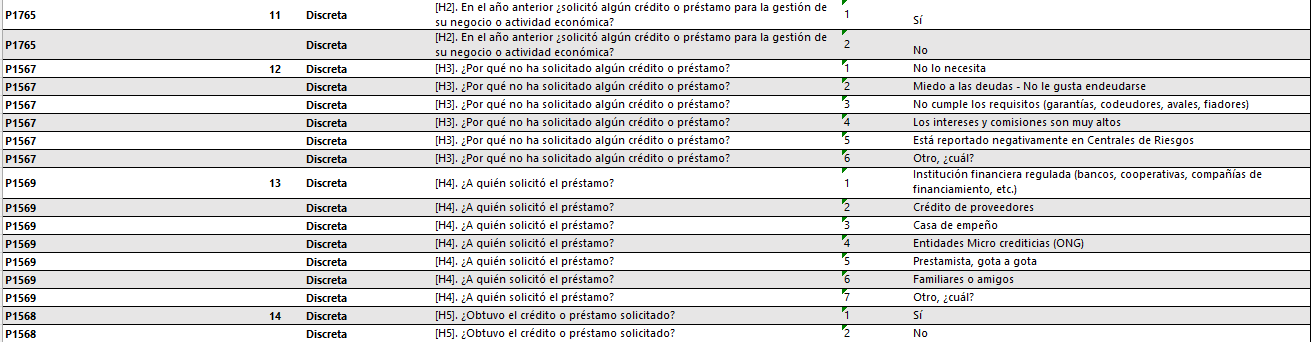

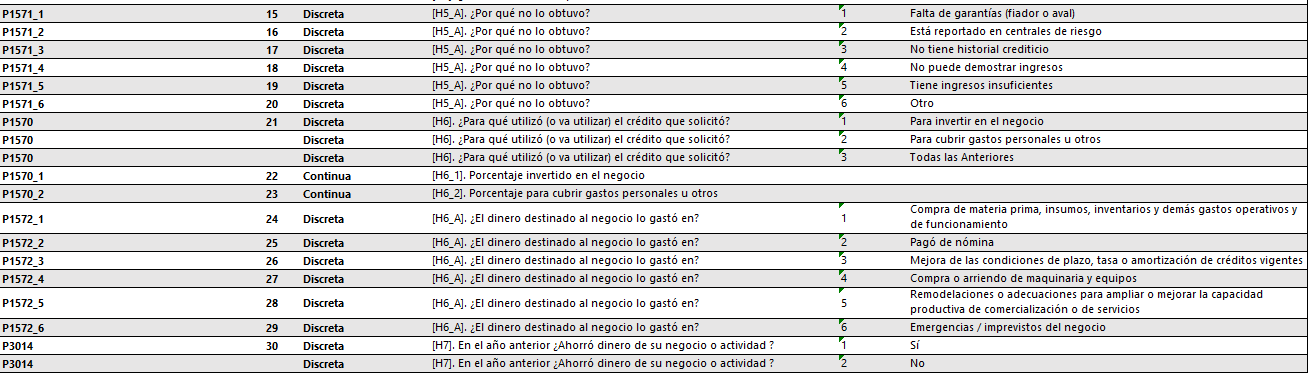

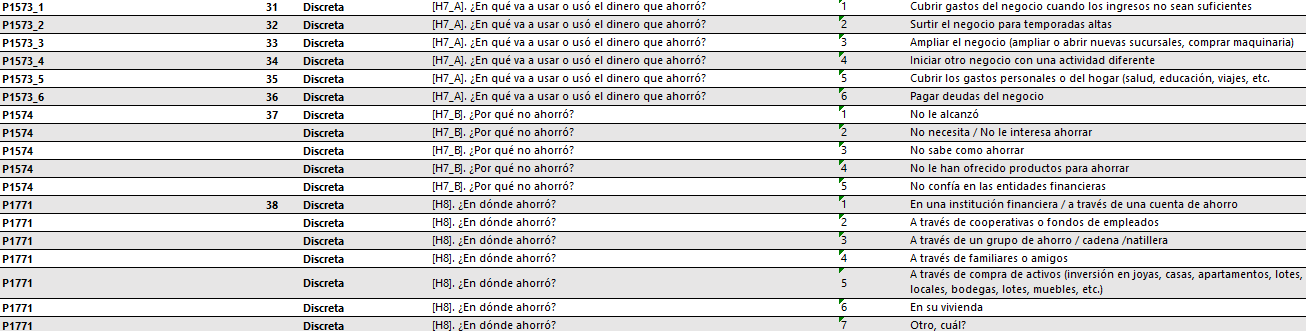

In [440]:
modulo_fin = pd.read_csv("../../../Data/Emicron-2022/Módulo de inclusión financiera.csv")

In [441]:
emicron_nan = {}

In [442]:
emicron_nan = pd.merge(emicron_nat, modulo_fin, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P", "CLASE_TE", "COD_DEPTO", "F_EXP"], how='left')

In [445]:
columns = ['P1765', 'P1567', 'P1569', 'P1568', 'P1571_1', 'P1571_2', 'P1571_3', 'P1571_4', 'P1571_5', 'P1571_6', 'P1570', 'P1572_1', 'P1572_2', 'P1572_3', 'P1572_4', 'P1572_5', 'P1572_6', 'P3014', 'P1573_1', 'P1573_2', 'P1573_3', 'P1573_4', 'P1573_5', 'P1573_6', 'P1574', 'P1771']

for column in columns:
    # Group by the values in the column and calculate the weighted sum for each group
    weighted_distribution = emicron_nan.groupby(column)['F_EXP'].sum()
    
    # Normalize the weights to get the distribution
    weighted_distribution /= weighted_distribution.sum()
    
    # Convert to a DataFrame for better readability
    weighted_distribution_df = weighted_distribution.reset_index()
    weighted_distribution_df.columns = [column, 'Weighted Distribution']
    
    # Print the table
    print(f"Weighted distribution for {column}:")
    print(weighted_distribution_df)
    print("\n")

Weighted distribution for P1765:
   P1765  Weighted Distribution
0    1.0               0.186176
1    2.0               0.813824


Weighted distribution for P1567:
   P1567  Weighted Distribution
0    1.0               0.225414
1    2.0               0.455147
2    3.0               0.186976
3    4.0               0.058851
4    5.0               0.042550
5    6.0               0.031063


Weighted distribution for P1569:
   P1569  Weighted Distribution
0    1.0               0.560386
1    2.0               0.028395
2    3.0               0.002142
3    4.0               0.018045
4    5.0               0.224355
5    6.0               0.162532
6    7.0               0.004146


Weighted distribution for P1568:
   P1568  Weighted Distribution
0    1.0                0.92212
1    2.0                0.07788


Weighted distribution for P1571_1:
   P1571_1  Weighted Distribution
0      1.0                    1.0


Weighted distribution for P1571_2:
   P1571_2  Weighted Distribution
0      1.0    

Weighted distribution for P1573_3:
   P1573_3  Weighted Distribution
0      1.0                    1.0


Weighted distribution for P1573_4:
   P1573_4  Weighted Distribution
0      1.0                    1.0


Weighted distribution for P1573_5:
   P1573_5  Weighted Distribution
0      1.0                    1.0


Weighted distribution for P1573_6:
   P1573_6  Weighted Distribution
0      1.0                    1.0


Weighted distribution for P1574:
   P1574  Weighted Distribution
0    1.0               0.979393
1    2.0               0.013470
2    3.0               0.003930
3    4.0               0.000944
4    5.0               0.002264


Weighted distribution for P1771:
   P1771  Weighted Distribution
0    1.0               0.269160
1    2.0               0.009139
2    3.0               0.022754
3    4.0               0.008585
4    5.0               0.009941
5    6.0               0.678692
6    7.0               0.001728




In [447]:
columns = ['P1571_1', 'P1571_2', 'P1571_3', 'P1571_4', 'P1571_5', 'P1571_6', 
           'P1572_1', 'P1572_2', 'P1572_3', 'P1572_4', 'P1572_5', 'P1572_6', 
           'P1573_1', 'P1573_2', 'P1573_3', 'P1573_4', 'P1573_5', 'P1573_6']

# Calculate the weighted average for each column
weighted_avg = emicron_nan[columns].multiply(emicron_nan['F_EXP'], axis=0).sum() / emicron_nan['F_EXP'].sum()

# Print the weighted average values
print("Weighted average values for the specified columns:")
print(weighted_avg)

Weighted average values for the specified columns:
P1571_1    0.005410
P1571_2    0.003250
P1571_3    0.003244
P1571_4    0.001958
P1571_5    0.001422
P1571_6    0.000680
P1572_1    0.111822
P1572_2    0.003863
P1572_3    0.005806
P1572_4    0.018879
P1572_5    0.010011
P1572_6    0.014401
P1573_1    0.071100
P1573_2    0.019183
P1573_3    0.008191
P1573_4    0.004423
P1573_5    0.109800
P1573_6    0.023879
dtype: float64


**saving emicron_native**

In [393]:
emicron_nat.to_csv('../../../Outputs/emicron_natives.csv', index=False)